# Loading The Required Libraries

In [137]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

<br><br>
# Setting Up The Directories

Specify the directories for the training, validation, and test data:

- `base_dir`: The base directory containing the dataset.
- `train_dir`: The directory containing the training images.
- `val_dir`: The directory containing the validation images.
- `test_dir`: The directory containing the test images.


In [138]:
base_dir = '/Users/sreehari/Desktop/knee'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

<br><br>
# Defining The Model Architecture

Create the model architecture using the Sequential API:

- `Conv2D`: Convolutional layer with 16 filters, a kernel size of (3, 3), ReLU activation, and input shape (150, 150, 3).
- `MaxPooling2D`: Max pooling layer with a pool size of (2, 2).
- Additional `Conv2D` and `MaxPooling2D` layers for feature extraction.
- `Flatten`: Flatten layer to convert the 3D feature maps to 1D.
- `Dense`: Fully connected layer with 512 units and ReLU activation.
- Final `Dense` layer with 1 unit and sigmoid activation for binary classification.


In [139]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

<br><br>
# Compiling The Model

Compile the model with the specified optimizer, loss function, and metrics:

- `RMSprop` optimizer with a learning rate of 0.001.
- `binary_crossentropy` as the loss function for binary classification.
- Accuracy as the evaluation metric.


In [140]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

<br><br><br><br>
# Data Augmentation and Preprocessing

Create data generators for data augmentation and preprocessing:

- `ImageDataGenerator` for training data with rescaling by 1./255.
- `ImageDataGenerator` for test data with rescaling by 1.0/255.


In [141]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.)

<br><br>
# Generate Batches of Training and Validation Data

Generate batches of training and validation data using the data generators:

- `flow_from_directory` method to load images from the specified directories.
- Set the batch size, class mode, and target size for the images.


In [142]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 8532 images belonging to 2 classes.
Found 386 images belonging to 2 classes.


<br><br><br><br>
# Train the Model

Train the model on the training data and validate on the validation data:

- Fit the model to the training data using the `fit` method.
- Specify the number of epochs and the validation data.
- Set `verbose=2` to display training progress.


In [143]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/30
427/427 - 30s - loss: 0.6843 - accuracy: 0.6169 - val_loss: 0.7936 - val_accuracy: 0.6010 - 30s/epoch - 71ms/step
Epoch 2/30
427/427 - 31s - loss: 0.5037 - accuracy: 0.7743 - val_loss: 0.3867 - val_accuracy: 0.8549 - 31s/epoch - 73ms/step
Epoch 3/30
427/427 - 29s - loss: 0.4103 - accuracy: 0.8231 - val_loss: 0.4000 - val_accuracy: 0.8135 - 29s/epoch - 68ms/step
Epoch 4/30
427/427 - 30s - loss: 0.3471 - accuracy: 0.8504 - val_loss: 0.3678 - val_accuracy: 0.8523 - 30s/epoch - 71ms/step
Epoch 5/30
427/427 - 34s - loss: 0.2851 - accuracy: 0.8813 - val_loss: 0.3384 - val_accuracy: 0.8523 - 34s/epoch - 81ms/step
Epoch 6/30
427/427 - 34s - loss: 0.2326 - accuracy: 0.9039 - val_loss: 0.3820 - val_accuracy: 0.8705 - 34s/epoch - 80ms/step
Epoch 7/30
427/427 - 34s - loss: 0.1789 - accuracy: 0.9293 - val_loss: 0.3150 - val_accuracy: 0.8886 - 34s/epoch - 80ms/step
Epoch 8/30
427/427 - 34s - loss: 0.1388 - accuracy: 0.9463 - val_loss: 0.3349 - val_accuracy: 0.8834 - 34s/epoch - 79ms/step


<br><br><br><br><br><br>
# Visualize Training and Validation Accuracy

Visualize the training and validation accuracy over epochs using Matplotlib:

- Extract the accuracy and loss values from the training history.
- Plot the training and validation accuracy curves.
- Add a title and legend to the plot.

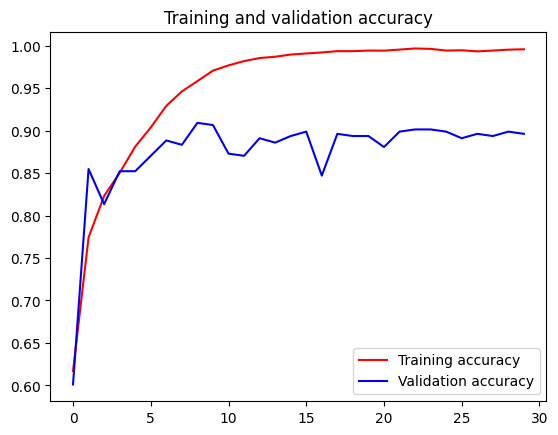

<Figure size 640x480 with 0 Axes>

In [144]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

<br><br>
# Evaluate the Model on Test Data

Evaluate the trained model on the test data:

- Generate batches of test data using the test data generator.
- Use the `evaluate` method to calculate the test loss and accuracy.
- Print the test loss and accuracy.


In [168]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

Found 96 images belonging to 2 classes.


In [169]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

5/5 [==============================] - 1s 170ms/step - loss: 1.1029 - accuracy: 0.9375
Test Loss: 1.1028765439987183
Test Accuracy: 0.9375
